In [24]:
#import Libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
#read entire and predicted actives
df_final = pd.read_csv('final.csv')
df_pred = pd.read_csv('top_8.csv')
df_check = pd.read_csv('top_8.csv') #use this for analysis with all columns
#display actives dataset
df_pred

,USER_ID,D001,D002,D003,D004,D005,D006,D007,D008,D009,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,F5076-0070,1,0,0,1,2,0,0,0,0,...,0,0,1,0,0,0,5.285,-0.601,0.200,1.615
1,F0617-0286,2,0,0,1,2,0,0,0,0,...,0,0,1,0,0,0,5.248,-0.342,0.414,2.605
2,F1885-0134,2,0,0,1,2,0,0,0,0,...,0,0,1,0,0,0,5.285,-0.696,0.414,2.173
3,F0617-0312,2,0,0,1,2,0,0,0,0,...,0,0,1,0,0,0,5.285,-0.320,0.400,2.101
4,F3215-0044,3,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.322,-0.830,0.643,4.594
5,F3273-0673,3,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.392,-0.769,0.600,4.561
6,F0554-0022,3,0,0,1,3,0,0,0,0,...,0,0,1,0,0,0,5.524,-0.799,0.529,3.913
7,F0554-0835,3,0,0,2,3,0,0,0,0,...,0,0,1,0,0,0,5.714,-0.794,0.436,3.407


In [25]:
#drop unnecessary columns of pred dataset
df_pred.drop(['USER_ID'], axis=1, inplace=True)

In [26]:
#remove low variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8*(1-.8)))

#split dataset into training and testing sets
X = df_final.drop(['Activity'],axis=1)
y = df_final['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit on the train
_ = vt.fit(X_train)

#get the mask
mask = vt.get_support()

#subset the dataframe
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:,mask] # not needed since we are not using it

#subset actives data
df_pred = df_pred.loc[:, mask]

#rename X_Train as df_train
df_train = X_train

#check the shape of the datasets
df_train.shape, df_pred.shape

((156195, 359), (8, 359))

In [27]:
#locate only descriptor values in training dataset
#359 refers to the number of columns left
df_train_extract = df_train.iloc[:,0:359]  
df_train_lev = df_train.iloc[:,0:359]
df_train_extract.head()
#locate only descriptor values in testing dataset
df_pred_extract = df_pred.iloc[:,0:359]    
df_pred_lev = df_pred.iloc[:,0:359]
df_pred_extract.head()

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,1,1,2,12,3,10,6,6,39.0,16,...,1,0,2,1,0,0,0,1,1,1.615
1,2,1,2,15,4,11,3,12,38.0,23,...,0,0,1,0,0,1,0,0,1,2.605
2,2,1,2,16,3,10,4,12,39.0,17,...,1,1,1,0,0,0,0,1,1,2.173
3,2,1,2,15,4,12,3,12,39.0,23,...,0,1,1,0,0,1,0,0,1,2.101
4,3,1,3,21,5,5,3,18,40.0,16,...,0,0,0,0,1,0,0,0,0,4.594


In [28]:
#combine both train and pred datasets
df_total = pd.concat([df_train,df_pred])
df_total.head()

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
38654,1,1,2,10,3,4,4,6,30.0,19,...,1,0,0,0,0,1,0,1,0,2.22693
67984,1,0,2,9,3,8,3,6,27.0,14,...,1,1,0,0,0,1,1,0,1,2.75610
27360,3,1,4,22,8,11,4,18,53.0,24,...,0,3,0,0,1,1,1,1,0,2.31045
6396,1,2,2,8,7,5,2,6,32.0,15,...,0,0,0,0,0,1,1,0,0,3.33703
53838,1,0,1,9,1,14,3,6,29.0,16,...,0,1,0,0,0,0,0,0,0,2.29674


In [29]:
#locate only descriptor values in total dataset
df_total_lev = df_total.iloc[:,0:359]

In [30]:
#Calculating the mean and standard deviations of total dataset
mean = df_total.mean(axis=0) #add mean at bottom of dataset
std = df_total.std(axis=0)   #add standard deviation at bottom of dataset
df_total2 = df_total.append(pd.DataFrame([mean]),ignore_index=True)
df_total2 = df_total2.append(pd.DataFrame([std]),ignore_index=True)
df_total2.head()

C:\Users\brian\AppData\Local\Temp\ipykernel_17096\514556267.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total2 = df_total.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_17096\514556267.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_total2 = df_total2.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,1.0,1.0,2.0,10.0,3.0,4.0,4.0,6.0,30.0,19.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.22693
1,1.0,0.0,2.0,9.0,3.0,8.0,3.0,6.0,27.0,14.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.75610
2,3.0,1.0,4.0,22.0,8.0,11.0,4.0,18.0,53.0,24.0,...,0.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2.31045
3,1.0,2.0,2.0,8.0,7.0,5.0,2.0,6.0,32.0,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.33703
4,1.0,0.0,1.0,9.0,1.0,14.0,3.0,6.0,29.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.29674


In [31]:
#Standardisation of descriptor values of train dataset
df_total3 = df_total_lev.loc[:, :] - df_total2.iloc[156203] #156240 refers to the number of total rows(156242) - last 2 rows(mean and std)
df_total4 = df_total3.abs()/ df_total2.iloc[156203]
df_total4['mean'] = df_total4.mean(axis=1)
df_total4['std'] = df_total4.std(axis=1)
df_total4['leverages'] = (df_total4['mean'] + 1.28) * df_total4['std']
df_total4

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
38654,0.262741,0.221624,0.053525,0.159563,0.174441,0.508375,0.073811,0.260888,0.127792,0.000149,...,1.0,1.00000,4.90314,1.000000,0.063532,1.000000,0.043101,0.524012,1.101741,1.987555
67984,0.262741,1.000000,0.053525,0.243606,0.174441,0.016749,0.194642,0.260888,0.215013,0.263048,...,1.0,1.00000,4.90314,1.511666,1.000000,1.994689,0.290966,0.511394,0.770845,1.380887
27360,1.211776,0.221624,0.892951,0.848962,1.201492,0.351970,0.073811,1.217335,0.540900,0.263346,...,1.0,2.53945,4.90314,1.511666,0.063532,1.000000,0.082222,0.867127,0.934467,2.006419
6396,0.262741,1.443249,0.053525,0.327650,0.926305,0.385468,0.463094,0.260888,0.069645,0.210408,...,1.0,1.00000,4.90314,1.511666,1.000000,1.000000,0.563075,0.651724,1.827769,3.530744
53838,0.262741,1.000000,0.526762,0.243606,0.724814,0.720689,0.194642,0.260888,0.156866,0.157769,...,1.0,1.00000,1.00000,1.000000,1.000000,1.000000,0.075800,0.724113,2.107327,4.223320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.474517,0.221624,0.053525,0.260656,0.100746,0.474876,0.194642,0.478223,0.133870,0.210707,...,1.0,1.00000,4.90314,1.000000,1.000000,1.994689,0.015885,0.413371,0.550793,0.932697
4,1.211776,0.221624,0.419713,0.764918,0.375932,0.385468,0.194642,1.217335,0.162944,0.157769,...,1.0,2.53945,1.00000,1.000000,1.000000,1.000000,1.151844,0.427585,0.549434,0.938205
5,1.211776,0.221624,0.419713,0.764918,0.375932,0.139656,0.194642,1.217335,0.221091,0.210408,...,1.0,2.53945,1.00000,1.000000,0.063532,1.000000,1.136387,0.475035,0.735234,1.290361
6,1.211776,0.221624,0.419713,0.764918,0.375932,0.229063,0.194642,1.217335,0.337385,0.210707,...,1.0,2.53945,4.90314,1.000000,1.000000,1.994689,0.832861,0.538050,0.560396,1.018828


In [32]:
#Max values of descriptors
maxValues = df_total4[df_total4.max(axis = 1) > 3]
maxValues.head()

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
38654,0.262741,0.221624,0.053525,0.159563,0.174441,0.508375,0.073811,0.260888,0.127792,0.000149,...,1.0,1.00000,4.90314,1.000000,0.063532,1.000000,0.043101,0.524012,1.101741,1.987555
67984,0.262741,1.000000,0.053525,0.243606,0.174441,0.016749,0.194642,0.260888,0.215013,0.263048,...,1.0,1.00000,4.90314,1.511666,1.000000,1.994689,0.290966,0.511394,0.770845,1.380887
27360,1.211776,0.221624,0.892951,0.848962,1.201492,0.351970,0.073811,1.217335,0.540900,0.263346,...,1.0,2.53945,4.90314,1.511666,0.063532,1.000000,0.082222,0.867127,0.934467,2.006419
6396,0.262741,1.443249,0.053525,0.327650,0.926305,0.385468,0.463094,0.260888,0.069645,0.210408,...,1.0,1.00000,4.90314,1.511666,1.000000,1.000000,0.563075,0.651724,1.827769,3.530744
53838,0.262741,1.000000,0.526762,0.243606,0.724814,0.720689,0.194642,0.260888,0.156866,0.157769,...,1.0,1.00000,1.00000,1.000000,1.000000,1.000000,0.075800,0.724113,2.107327,4.223320


In [33]:
#Check for compounds with leverages above threshold
df_leverages = df_total4.loc[df_total4['leverages'] > 3]
df_leverages

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
6396,0.262741,1.443249,0.053525,0.327650,0.926305,0.385468,0.463094,0.260888,0.069645,0.210408,...,1.00000,1.00000,4.90314,1.511666,1.000000,1.000000,0.563075,0.651724,1.827769,3.530744
53838,0.262741,1.000000,0.526762,0.243606,0.724814,0.720689,0.194642,0.260888,0.156866,0.157769,...,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,0.075800,0.724113,2.107327,4.223320
106030,1.000000,0.221624,0.053525,0.327650,0.100746,0.016749,1.147622,1.000000,0.046649,0.210408,...,3.13312,1.00000,1.00000,4.023331,0.063532,1.000000,0.704552,0.709527,3.548436,7.059710
129023,0.474517,1.000000,0.419713,0.344700,0.174441,0.229063,0.073811,0.478223,0.192017,0.210408,...,1.06656,1.00000,1.00000,1.511666,0.063532,1.994689,0.858314,0.836094,3.132176,6.627979
160343,0.262741,1.000000,0.053525,0.159563,0.449627,0.262562,0.073811,0.260888,0.244087,0.368327,...,1.00000,1.00000,1.00000,1.000000,1.127063,1.000000,0.194016,0.627714,1.586505,3.026599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85305,0.262741,1.443249,0.526762,0.008525,0.174441,0.474876,0.610717,0.260888,0.133870,0.368327,...,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,0.446223,0.813658,3.241045,6.785639
67221,0.474517,1.000000,0.419713,0.176612,0.174441,0.474876,0.463094,0.478223,0.162944,0.368625,...,1.06656,2.53945,1.00000,1.000000,1.000000,1.000000,1.451987,1.938251,19.417427,62.490158
41090,0.474517,1.000000,0.892951,0.344700,0.651119,0.106157,0.073811,0.478223,0.424606,0.526544,...,1.06656,1.00000,1.00000,1.000000,1.000000,1.000000,0.259592,3.167840,31.619960,140.640511
54886,0.474517,0.221624,0.419713,0.260656,0.375932,0.139656,0.194642,0.478223,0.192017,0.052789,...,1.06656,2.53945,1.00000,1.511666,1.000000,1.000000,0.768334,0.834986,3.818996,8.077125


In [34]:
#Take out actives or pred dataset from the total dataset
df_total4_pred = df_total4.iloc[156195:156240,0:362] #156195 - end of train dataset or start of pred dataset, #156240 - end of pred dataset, #362 - number of columns
df_total4_pred

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
0,0.262741,0.221624,0.053525,0.008525,0.174441,0.229063,0.610717,0.260888,0.133870,0.157769,...,1.06656,1.00000,1.00000,1.0,0.063532,1.994689,0.243529,0.592051,1.214586,2.273767
1,0.474517,0.221624,0.053525,0.260656,0.100746,0.351970,0.194642,0.478223,0.104796,0.210707,...,1.00000,1.00000,4.90314,1.0,1.000000,1.994689,0.220190,0.390853,0.555811,0.928679
2,0.474517,0.221624,0.053525,0.344700,0.174441,0.229063,0.073811,0.478223,0.133870,0.105130,...,1.00000,1.00000,1.00000,1.0,0.063532,1.994689,0.017840,0.369935,0.403058,0.665020
3,0.474517,0.221624,0.053525,0.260656,0.100746,0.474876,0.194642,0.478223,0.133870,0.210707,...,1.00000,1.00000,4.90314,1.0,1.000000,1.994689,0.015885,0.413371,0.550793,0.932697
4,1.211776,0.221624,0.419713,0.764918,0.375932,0.385468,0.194642,1.217335,0.162944,0.157769,...,1.00000,2.53945,1.00000,1.0,1.000000,1.000000,1.151844,0.427585,0.549434,0.938205
5,1.211776,0.221624,0.419713,0.764918,0.375932,0.139656,0.194642,1.217335,0.221091,0.210408,...,1.00000,2.53945,1.00000,1.0,0.063532,1.000000,1.136387,0.475035,0.735234,1.290361
6,1.211776,0.221624,0.419713,0.764918,0.375932,0.229063,0.194642,1.217335,0.337385,0.210707,...,1.00000,2.53945,4.90314,1.0,1.000000,1.994689,0.832861,0.538050,0.560396,1.018828
7,1.211776,1.443249,0.419713,0.848962,0.926305,0.351970,0.342264,1.094150,0.526364,0.315986,...,1.00000,1.00000,4.90314,1.0,1.000000,1.994689,0.595849,0.804165,0.883563,1.841490


In [35]:
df_total4_pred.index = [1,2,3,4,5,6,7,8]
df_total4_pred

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
1,0.262741,0.221624,0.053525,0.008525,0.174441,0.229063,0.610717,0.260888,0.133870,0.157769,...,1.06656,1.00000,1.00000,1.0,0.063532,1.994689,0.243529,0.592051,1.214586,2.273767
2,0.474517,0.221624,0.053525,0.260656,0.100746,0.351970,0.194642,0.478223,0.104796,0.210707,...,1.00000,1.00000,4.90314,1.0,1.000000,1.994689,0.220190,0.390853,0.555811,0.928679
3,0.474517,0.221624,0.053525,0.344700,0.174441,0.229063,0.073811,0.478223,0.133870,0.105130,...,1.00000,1.00000,1.00000,1.0,0.063532,1.994689,0.017840,0.369935,0.403058,0.665020
4,0.474517,0.221624,0.053525,0.260656,0.100746,0.474876,0.194642,0.478223,0.133870,0.210707,...,1.00000,1.00000,4.90314,1.0,1.000000,1.994689,0.015885,0.413371,0.550793,0.932697
5,1.211776,0.221624,0.419713,0.764918,0.375932,0.385468,0.194642,1.217335,0.162944,0.157769,...,1.00000,2.53945,1.00000,1.0,1.000000,1.000000,1.151844,0.427585,0.549434,0.938205
6,1.211776,0.221624,0.419713,0.764918,0.375932,0.139656,0.194642,1.217335,0.221091,0.210408,...,1.00000,2.53945,1.00000,1.0,0.063532,1.000000,1.136387,0.475035,0.735234,1.290361
7,1.211776,0.221624,0.419713,0.764918,0.375932,0.229063,0.194642,1.217335,0.337385,0.210707,...,1.00000,2.53945,4.90314,1.0,1.000000,1.994689,0.832861,0.538050,0.560396,1.018828
8,1.211776,1.443249,0.419713,0.848962,0.926305,0.351970,0.342264,1.094150,0.526364,0.315986,...,1.00000,1.00000,4.90314,1.0,1.000000,1.994689,0.595849,0.804165,0.883563,1.841490


In [36]:
AD = df_total4_pred['leverages'] #Get leverages column from pred table with leverages
actives_list = AD.index          #Get the indexes of all compounds in the pred table with leverages
#create empty lists for inliers and outliers indexes and leverages
in_domain = []
in_domain_leverages = []
outside_domain = []
outside_domain_leverages = []
#loop through actives list for inliers and outliers and append leverages to associated lists
for i in actives_list:
    #round leverage to three decimal places
    s_new = round(AD[i],3)
    if (s_new > 3).any():
        outside_domain.append(i)
        outside_domain_leverages.append(s_new)
    elif (s_new < 3).any():
        in_domain.append(i)
        in_domain_leverages.append(s_new)
in_domain
    

[1, 2, 3, 4, 5, 6, 7, 8]

In [45]:
#Create a table with USER_ID, probabilites and Applicability domain status of inliers
final_in_domain = df_check['USER_ID'][in_domain]
df1 = pd.DataFrame(final_in_domain)
# indomain_probabilities = df_check['Probabilities'][in_domain]
# df1['Probabilities'] = indomain_probabilities
In_AD = []
for i in in_domain:
    In_AD.append('1')
df1['AD_status'] = In_AD
df1

,USER_ID,AD_status
0,F5076-0070,1
1,F0617-0286,1
2,F1885-0134,1
3,F0617-0312,1
4,F3215-0044,1
5,F3273-0673,1
6,F0554-0022,1
7,F0554-0835,1


In [46]:
#Covert final dataframe into a csv
df1.to_csv('Actives_analysis.csv', index = True, header = True)

c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py:920: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
C:\Users\brian\AppData\Local\Temp\ipykernel_17096\4037712743.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(0), in_domain_leverages[i], c='red', s=300, label="Inlier", marker="p", edgecolors='white')


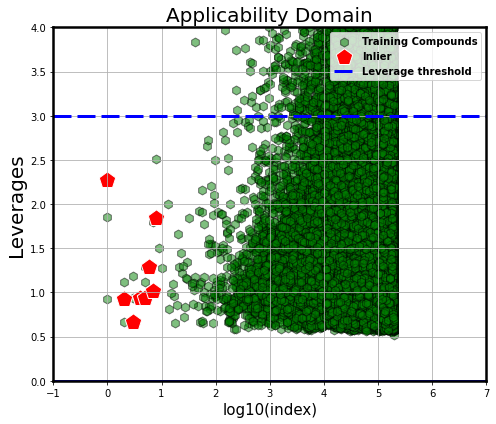

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
legend_properties = {'weight':'bold'}
#plot all training datapoints
plt.scatter(np.log10(df_total4.index), df_total4['leverages'], c='green', s=80, alpha=0.5, label="Training Compounds", marker="h", edgecolors='black')
#plot all predicting datapoints
for i in range(len(in_domain)):
    if(i == 0): #include label with if active 0 is an inlier
        plt.scatter(np.log10(0), in_domain_leverages[i], c='red', s=300, label="Inlier", marker="p", edgecolors='white')
    #plot all inliers in AD    
    plt.scatter(np.log10(in_domain[i]), in_domain_leverages[i], c='red', s=300, marker="p", edgecolors='white')

for i in range(len(outside_domain)):
    if (i == 0): #include label with if active 0 is an outlier
        plt.scatter(np.log10(outside_domain[i]), outside_domain_leverages[i], c='black', s=300, label="Outlier", marker="p", edgecolors='white')
    #plot all outliers in AD    
    plt.scatter(np.log10(outside_domain[i]), outside_domain_leverages[i], c='black', s=300, marker="p", edgecolors='white')

plt.axhline(y = 3, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'Leverage threshold' ) #Note threshold is x=3 
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)
plt.title("Applicability Domain", fontsize=20)
plt.xlabel("log10(index)", fontsize=15)
plt.ylabel("Leverages", fontsize=20)
plt.legend(loc="upper right", prop=legend_properties)
plt.ylim(0,4)
plt.xlim(-1,7)
plt.grid()
fig.savefig('final_AD.png') #save the AD as an image

In [38]:
#Create a table with USER_ID, probabilites and Applicability domain status of inliers
final_in_domain = df_check['USER_ID'][in_domain]
df1 = pd.DataFrame(final_in_domain)
indomain_probabilities = df_check['Probabilities'][in_domain]
df1['Probabilities'] = indomain_probabilities
In_AD = []
for i in in_domain:
    In_AD.append('1')
df1['AD_status'] = In_AD

KeyError: '[8] not in index'

In [ ]:
#Create a table with USER_ID, probabilites and Applicability domain status of outliers
final_outside_domain = df_check['USER_ID'][outside_domain]
df2 = pd.DataFrame(final_outside_domain)
outdomain_probabilities = df_check['Probabilities'][outside_domain]
df2['Probabilities'] = outdomain_probabilities
Outside_AD = []
for i in outside_domain:
    Outside_AD.append('0')
df2['AD_status'] = Outside_AD


In [ ]:
#Verify all compounds are present
final_8 = pd.concat([df1,df2])
final_8.shape

(45, 3)

In [ ]:
#Covert final dataframe into a csv
final_8.to_csv('Actives_analysis.csv', index = True, header = True)